In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import jax
import jax.numpy as jnp
import os
import scipy
import pylab as plt
import blackjax
import time
from regression_logdensity import make_regression_logdensity

Data: spam
Number of samples (Mici): 4500
Number of samples (Blackjax): 90000
Data: krkp
Number of samples (Mici): 4500
Number of samples (Blackjax): 90000
Data: ionosphere
Number of samples (Mici): 4500
Number of samples (Blackjax): 90000
Data: mushroom
Number of samples (Mici): 4500
Number of samples (Blackjax): 90000


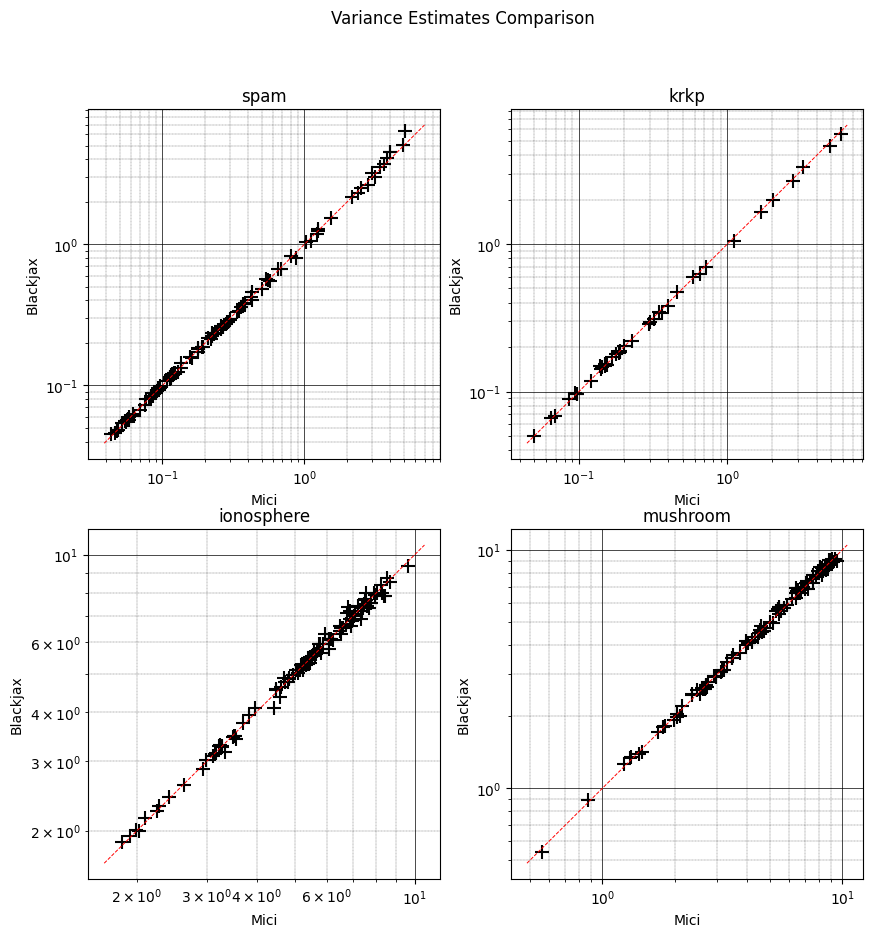

In [10]:
data_list = ["spam", "krkp", "ionosphere", "mushroom"]

plt.figure(figsize=(10, 10))
plt.suptitle("Variance Estimates Comparison")
for data_name in data_list:
    folder_name = "mcmc_outputs"
    mici_data = np.load(folder_name + "/" + data_name + "_MCMC_mici.npz")
    blackjax_data = np.load(folder_name + "/" + data_name + "_MCMC_blackjax.npz")
    
    # print the number of samples for each sampler
    print(f"Data: {data_name}")
    print(f"Number of samples (Mici): {mici_data['MCMC_history'].shape[0]}")
    print(f"Number of samples (Blackjax): {blackjax_data['MCMC_history'].shape[0]}")
    
    plt.subplot(2, 2, data_list.index(data_name) + 1)
    variances_mici = np.diag(mici_data["Sigma_mcmc"])
    variances_blackjax = np.diag(blackjax_data["Sigma_mcmc"])
    #plt.plot(np.diag(mici_data["Sigma_mcmc"]), "r-")
    #plt.plot(np.diag(blackjax_data["Sigma_mcmc"]), "b-")
    # do scatter plot with the two marginals variances
    plt.scatter(variances_mici, variances_blackjax, marker="+", color="k", s=100)
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(which="major", color="k", linestyle="-", linewidth=0.5)
    plt.grid(which="minor", color="k", linestyle="--", linewidth=0.2)
    
    # add the diagonal
    var_min = 0.9*min(variances_mici.min(), variances_blackjax.min())
    var_max = 1.1*max(variances_mici.max(), variances_blackjax.max())
    plt.plot([var_min, var_max], [var_min, var_max], "r--", lw=0.7)
    plt.title(f"{data_name}")
    plt.xlabel("Mici")
    plt.ylabel("Blackjax")
    
    # save the figure
    plt.savefig("variance_comparison.png", dpi=300)
    
    
    

Data: spam
Number of samples (Mici): 4500
Number of samples (Blackjax): 90000
Data: krkp
Number of samples (Mici): 4500
Number of samples (Blackjax): 90000
Data: ionosphere
Number of samples (Mici): 4500
Number of samples (Blackjax): 90000
Data: mushroom
Number of samples (Mici): 4500
Number of samples (Blackjax): 90000


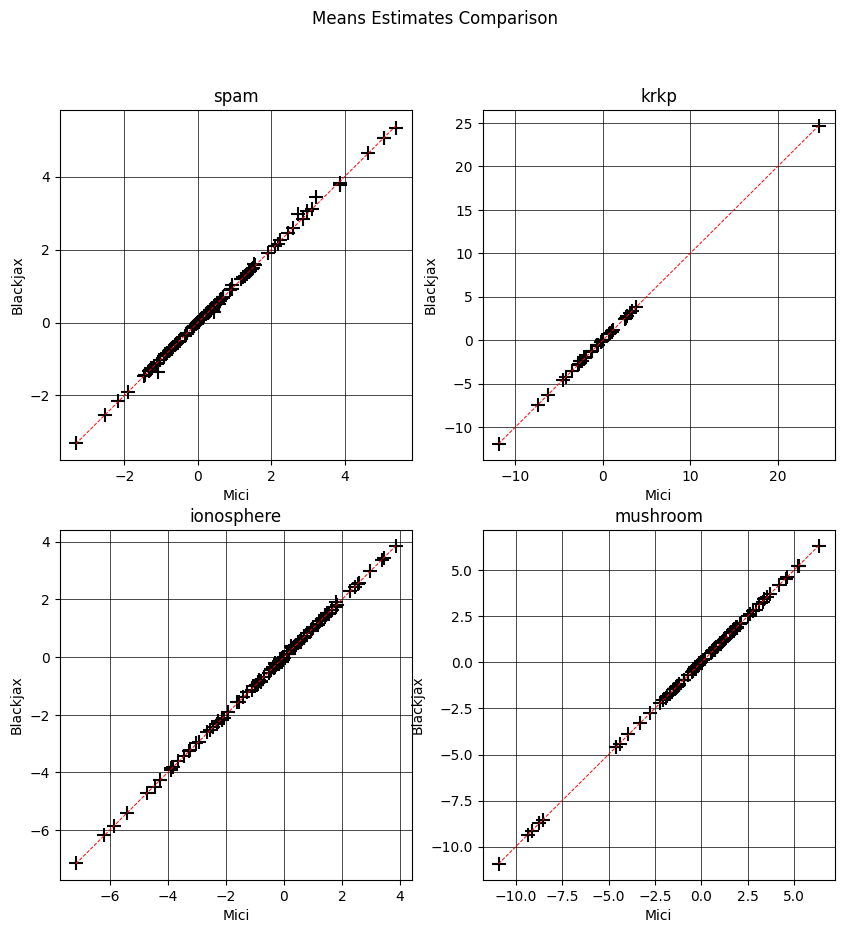

In [15]:
data_list = ["spam", "krkp", "ionosphere", "mushroom"]

plt.figure(figsize=(10,10))
plt.suptitle("Means Estimates Comparison")
for data_name in data_list:
    folder_name = "mcmc_outputs"
    mici_data = np.load(folder_name + "/" + data_name + "_MCMC_mici.npz")
    blackjax_data = np.load(folder_name + "/" + data_name + "_MCMC_blackjax.npz")
    
    # print the number of samples for each sampler
    print(f"Data: {data_name}")
    print(f"Number of samples (Mici): {mici_data['MCMC_history'].shape[0]}")
    print(f"Number of samples (Blackjax): {blackjax_data['MCMC_history'].shape[0]}")
    
    plt.subplot(2, 2, data_list.index(data_name) + 1)
    means_mici = mici_data["mu_mcmc"]
    means_blackjax = blackjax_data["mu_mcmc"]
    #plt.plot(np.diag(mici_data["Sigma_mcmc"]), "r-")
    #plt.plot(np.diag(blackjax_data["Sigma_mcmc"]), "b-")
    # do scatter plot with the two marginals variances
    plt.scatter(means_mici, means_blackjax, marker="+", color="k", s=100)
    plt.grid(which="major", color="k", linestyle="-", linewidth=0.5)
    plt.grid(which="minor", color="k", linestyle="--", linewidth=0.2)
    
    # add the diagonal
    var_min = min(means_mici.min(), means_blackjax.min())
    var_max = max(means_mici.max(), means_blackjax.max())
    plt.plot([var_min, var_max], [var_min, var_max], "r--", lw=0.7)
    plt.title(f"{data_name}")
    plt.xlabel("Mici")
    plt.ylabel("Blackjax")
    
    # save the figure
    plt.savefig("mean_comparison.png", dpi=300)